## 1 First Problem 

### 1.1 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rc("font",family='YouYuan')
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
df1=pd.read_excel('chongqing data.xlsx')
df1 = df1.sort_values(by='Year') # 年份从小到大排
# df1.head() # 查看前五行
# print(df1.columns)
p_col = ['Year', 'GDP', 'primary_industry', 'secondary_industry',
       'tertiary_industry', 'Population', 'Average_wage',
       'Investment_in_real_estate_development',
       'Sales_area_of_commercial_housing',
       'Average_sales_price_of_commercial_housing',
       'Public_budget_expenditure',
       'Total_import_and_export_of_goods',
       'Passenger_transport_capacity',
       'Cargo_transportation_volume', 'College_students']
df1.columns = p_col
df1.head()

,Year,GDP,primary_industry,secondary_industry,tertiary_industry,Population,Average_wage,Investment_in_real_estate_development,Sales_area_of_commercial_housing,Average_sales_price_of_commercial_housing,Public_budget_expenditure,Total_import_and_export_of_goods,Passenger_transport_capacity,Cargo_transportation_volume,College_students
23,1996,1315.12,287.56,568.99,458.57,3022.77,4592,50.83,166.21,1269.0,79.42,1585.43,43123,25818,7.9900
22,1997,1509.75,307.21,650.40,552.14,3042.92,5643,67.50,236.76,1295.0,101.01,1678.43,45640,23562,8.0600
21,1998,1602.38,300.89,675.64,625.85,3059.69,6433,97.30,416.82,1349.0,125.76,1033.86,48657,25027,8.3187
20,1999,1663.20,286.16,697.81,679.23,3072.34,7182,112.51,429.98,1377.0,150.24,1210.44,52276,25174,9.6569
19,2000,1791.00,284.87,760.03,746.10,3091.09,8020,139.63,579.96,1351.0,187.64,1785.46,56667,26716,12.6279


In [3]:
df2=pd.read_excel('CHONGQING2.xlsx')
df2 = df2.sort_values(by='date') # 年份从小到大排
df2.head()

,Time,date,value
62,2005-01,2005S1,639.90
61,2005-02,2005S2,1319.22
60,2005-03,2005S3,2113.89
59,2005-04,2005S4,3069.10
58,2006-01,2006S1,697.22


### 1.2 画折线图

In [4]:
tmpdata = df1[['Year','GDP','primary_industry','secondary_industry','tertiary_industry']].copy() # 提取出需要的列
tmpdata.head()

,Year,GDP,primary_industry,secondary_industry,tertiary_industry
23,1996,1315.12,287.56,568.99,458.57
22,1997,1509.75,307.21,650.40,552.14
21,1998,1602.38,300.89,675.64,625.85
20,1999,1663.20,286.16,697.81,679.23
19,2000,1791.00,284.87,760.03,746.10


In [5]:
tmpdata['primary_industry'] = tmpdata['primary_industry']/tmpdata['GDP']
tmpdata['secondary_industry'] = tmpdata['secondary_industry']/tmpdata['GDP']
tmpdata['tertiary_industry'] = tmpdata['tertiary_industry']/tmpdata['GDP']

tmpdata.tail() # 查看后几行

,Year,GDP,primary_industry,secondary_industry,tertiary_industry
4,2015,15717.27,0.073177,0.449784,0.477039
3,2016,17740.59,0.073461,0.445246,0.481293
2,2017,19424.73,0.065694,0.441942,0.492364
1,2018,21588.80,0.063861,0.409575,0.526564
0,2019,23605.77,0.065722,0.402310,0.531968


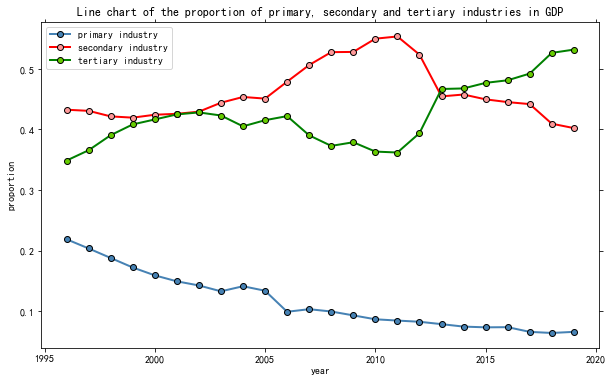

In [6]:
# Set the size of the frame
fig = plt.figure(figsize=(10,6))

# primary industry
plt.plot(tmpdata.Year, # x-axis data
         tmpdata['primary_industry'], # y-axis data
         linestyle ='-', # Polyline type
         linewidth = 2, # Polyline width
         color ='steelblue', # Polyline color
         marker ='o', # point shape
         markersize = 6, # point size
         markeredgecolor='black', # the border color of the point
         markerfacecolor='steelblue', # fill color of the point
         label ='primary industry') # Add label

# secondary industry
plt.plot(tmpdata.Year, # x-axis data
         tmpdata['secondary_industry'], # y-axis data
         linestyle ='-', # Polyline type
         linewidth = 2, # Polyline width
         color ='r', # Polyline color
         marker ='o', # point shape
         markersize = 6, # point size
         markeredgecolor='black', # the border color of the point
         markerfacecolor='#ff9999', # Fill color of the point
         label ='secondary industry') # Add label

# tertiary industry
plt.plot(tmpdata.Year, # x-axis data
         tmpdata['tertiary_industry'], # y-axis data
         linestyle ='-', # Polyline type
         linewidth = 2, # Polyline width
         color ='g', # polyline color
         marker ='o', # point shape
         markersize = 6, # point size
         markeredgecolor='black', # the border color of the point
         markerfacecolor='#66CD00', # Fill color of the point
         label ='tertiary industry') # Add label

# Add title and axis labels
plt.title('Line chart of the proportion of primary, secondary and tertiary industries in GDP')
plt.xlabel('year')
plt.ylabel('proportion')


# Remove the scale of the upper and right borders of the frame
plt.tick_params(top ='off', right ='off')

# Show legend
plt.legend()
# Display graphics
plt.show()

In [7]:
# !  pip install scipy==1.2 --upgrade
# ! pip install --user statsmodels --upgrade
# ! pip uninstall statsmodels

### 1.3 Multiple linear regression of GDP and other columns

In [8]:

from sklearn import linear_model
import statsmodels.api as sm
df1.head()


,Year,GDP,primary_industry,secondary_industry,tertiary_industry,Population,Average_wage,Investment_in_real_estate_development,Sales_area_of_commercial_housing,Average_sales_price_of_commercial_housing,Public_budget_expenditure,Total_import_and_export_of_goods,Passenger_transport_capacity,Cargo_transportation_volume,College_students
23,1996,1315.12,287.56,568.99,458.57,3022.77,4592,50.83,166.21,1269.0,79.42,1585.43,43123,25818,7.9900
22,1997,1509.75,307.21,650.40,552.14,3042.92,5643,67.50,236.76,1295.0,101.01,1678.43,45640,23562,8.0600
21,1998,1602.38,300.89,675.64,625.85,3059.69,6433,97.30,416.82,1349.0,125.76,1033.86,48657,25027,8.3187
20,1999,1663.20,286.16,697.81,679.23,3072.34,7182,112.51,429.98,1377.0,150.24,1210.44,52276,25174,9.6569
19,2000,1791.00,284.87,760.03,746.10,3091.09,8020,139.63,579.96,1351.0,187.64,1785.46,56667,26716,12.6279


In [9]:
print(df1.columns)

Index(['Year', 'GDP', 'primary_industry', 'secondary_industry',
       'tertiary_industry', 'Population', 'Average_wage',
       'Investment_in_real_estate_development',
       'Sales_area_of_commercial_housing',
       'Average_sales_price_of_commercial_housing',
       'Public_budget_expenditure', 'Total_import_and_export_of_goods',
       'Passenger_transport_capacity', 'Cargo_transportation_volume',
       'College_students'],
      dtype='object')


In [10]:
# print(df1.columns)
Y = df1['GDP'].copy()
X = df1[['Population', 'Average_wage',
       'Investment_in_real_estate_development',
       'Sales_area_of_commercial_housing',
       'Average_sales_price_of_commercial_housing',
       'Public_budget_expenditure', 'Total_import_and_export_of_goods',
       'Passenger_transport_capacity', 'Cargo_transportation_volume',
       'College_students']].copy()
# X.head()


X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6955.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.54e-22
Time:                        20:29:55   Log-Likelihood:                -143.52
No. Observations:                  24   AIC:                             309.0
Df Residuals:                      13   BIC:                             322.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [11]:

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6955.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.54e-22
Time:                        20:29:55   Log-Likelihood:                -143.52
No. Observations:                  24   AIC:                             309.0
Df Residuals:                      13   BIC:                             322.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [12]:

from statsmodels.formula.api import ols
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### 1.3.1 检验多重共线性 

In [13]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)


,VIF Factor,features
0,130299.2,const
1,246.8,Population
2,250.8,Average_wage
3,613.0,Investment_in_real_estate_development
4,75.9,Sales_area_of_commercial_housing
5,73.2,Average_sales_price_of_commercial_housing
6,237.1,Public_budget_expenditure
7,43.5,Total_import_and_export_of_goods
8,13.0,Passenger_transport_capacity
9,139.8,Cargo_transportation_volume


In [14]:
! pip install stepwise-regression
# ! pip install mlxtend

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple/


### 1.4 Stepwise regression of GDP and other columns

In [15]:
# ! pip install --user mlxtend
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import stepwise_regression
# forward_regression(X,Y)

def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included


forward_regression(X,Y, threshold_in=0.05)



<ipython-input-15-0792d0569b33>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


['Average_wage',
 'College_students',
 'Public_budget_expenditure',
 'const',
 'Population']

接下来使用 forward_regression 挑出来的变量进行回归分析

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('GDP ~ Average_wage+College_students+Public_budget_expenditure+Population', data=df1).fit()

#view model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.340e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.74e-32
Time:                        20:30:00   Log-Likelihood:                -151.20
No. Observations:                  24   AIC:                             312.4
Df Residuals:                      19   BIC:                             318.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

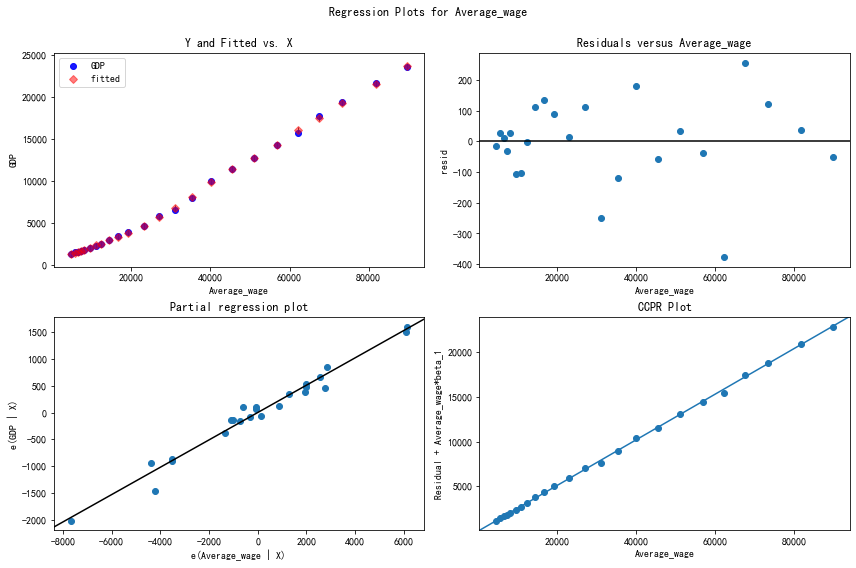

In [17]:
#create residual vs. predictor plot for 'Average_wage'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Average_wage', fig=fig)

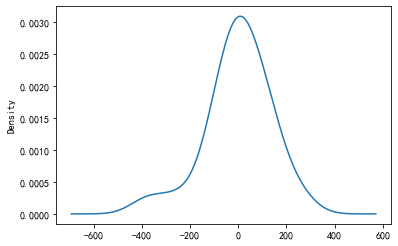

In [18]:
plt.figure()
#ols.fit().model is a method to access to the residual.
model.resid.plot.density()
plt.show()

从图中可以看出，残差是正态分布的。顺便说一句，残差平均值始终为零，达到机器精度。

In [19]:
print('Residual mean:', np.mean(model.resid))
#[out]: Residual mean: -3.6370314167773664e-11

Residual mean: -3.6370314167773664e-11


### 1.5 画相关系数矩阵热力图

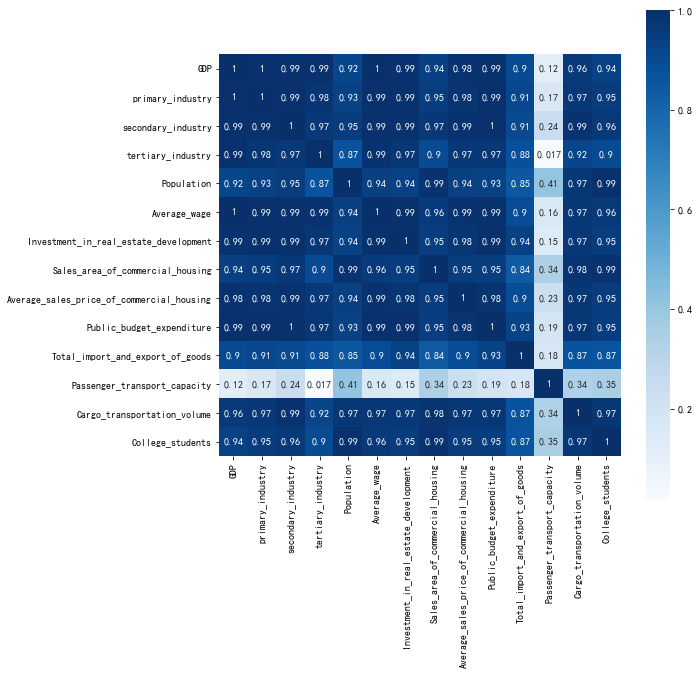

In [20]:

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
plt.subplots(figsize=(9, 9))

a = df1[[ 'GDP', 'primary_industry', 'secondary_industry',
       'tertiary_industry', 'Population', 'Average_wage',
       'Investment_in_real_estate_development',
       'Sales_area_of_commercial_housing',
       'Average_sales_price_of_commercial_housing',
       'Public_budget_expenditure', 'Total_import_and_export_of_goods',
       'Passenger_transport_capacity', 'Cargo_transportation_volume',
       'College_students']].corr()

sns.heatmap(a, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()


### 1.6 logistic regression

In [21]:
X = df1[['Average_wage','College_students','Public_budget_expenditure','Population']].copy()
model = sm.Logit(Y, X)

ValueError: endog must be in the unit interval.

出错原因：逻辑回归的因变量必须为**分类变量**(比如取值为0/1)

## 2 Second Problem

### 2.1 Arima model

In [22]:
df2=pd.read_excel('CHONGQING2.xlsx')
df2 = df2.sort_values(by='date') # 年份从小到大排
df2 = df2.reset_index()
del df2['index']
df2


,Time,date,value
0,2005-01,2005S1,639.90
1,2005-02,2005S2,1319.22
2,2005-03,2005S3,2113.89
3,2005-04,2005S4,3069.10
4,2006-01,2006S1,697.22
...,...,...,...
58,2019-03,2019S3,16982.40
59,2019-04,2019S4,23605.77
60,2020-01,2020S1,4987.66
61,2020-02,2020S2,11209.83


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
sns.set(color_codes=True)

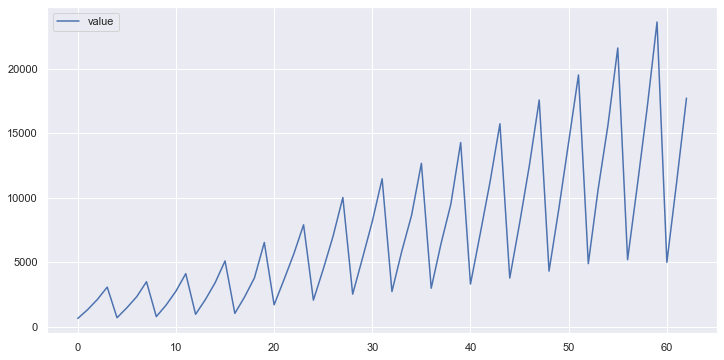

In [24]:
df2.plot(figsize=(12,6)) 

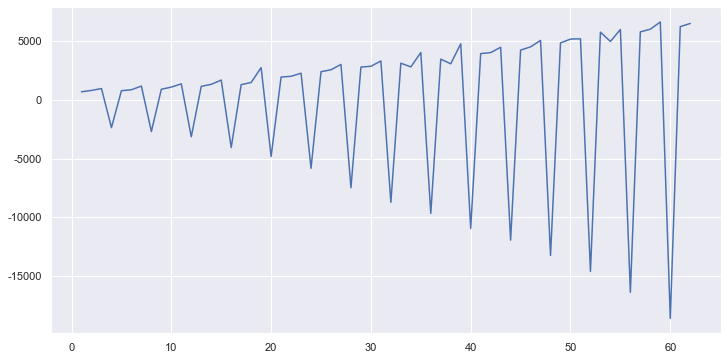

In [25]:
# 计算 1阶差分
diff1 = df2.value.diff(1) 
diff1.plot(figsize=(12,6))

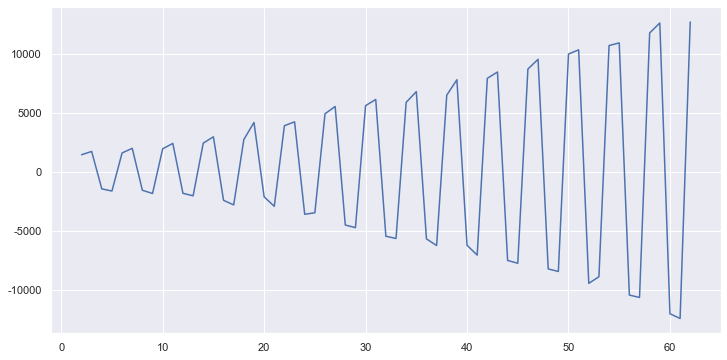

In [26]:
# 再来看看2阶差分的效果
diff2 = df2.value.diff(2)
diff2.plot(figsize=(12,6))

C:\ProgramData\Anaconda3_2020\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


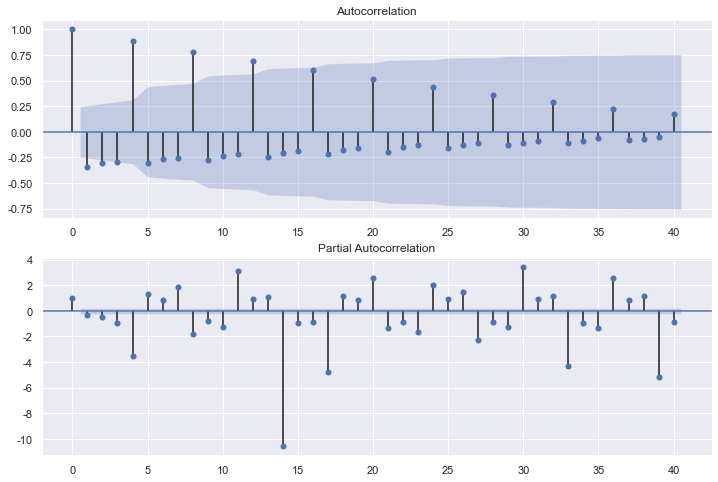

In [27]:
diff1.dropna(inplace=True) 
fig = plt.figure(figsize=(12,8)) 
ax1=fig.add_subplot(211) 
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1) 
ax2 = fig.add_subplot(212) 
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

#### 不平稳，不能做 arima 模型

### 2.1 SARIMA model

In [29]:
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


In [30]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()


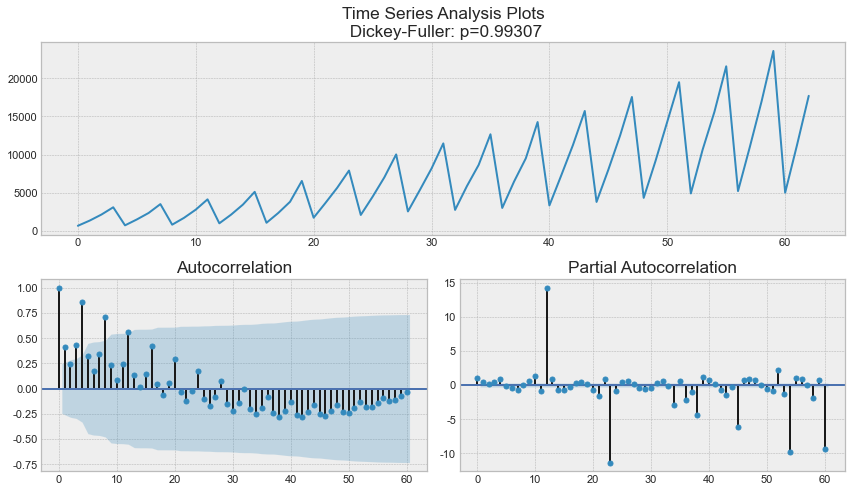

In [31]:
tsplot(df2.value, lags=60)

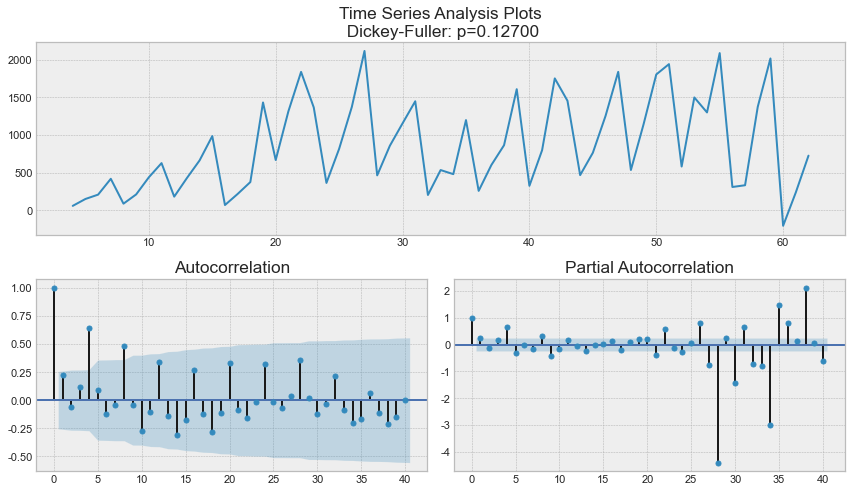

In [32]:
# The seasonal difference
ads_diff = df2.value - df2.value.shift(4)
tsplot(ads_diff[4:], lags=40)


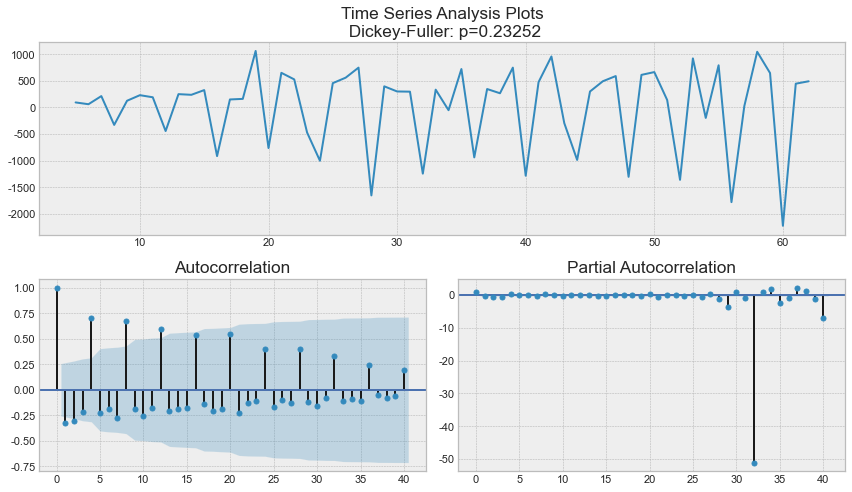

In [33]:
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[4+1:], lags=40)

In [35]:
# ads_diff[0:10]
# ts

In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import warnings

p=d=q=range(0,2)
print("p=",p,"d=",d,"q=",q)
#产生不同的pdq元组,得到 p d q 全排列
pdq=list(itertools.product(p,d,q))
print("pdq:\n",pdq)
seasonal_pdq=[(x[0],x[1],x[2],4) for x in pdq]
print('SQRIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df2.value,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
 
            results = mod.fit()
 
            print('SARIMAX{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
            

p= range(0, 2) d= range(0, 2) q= range(0, 2)
pdq:
 [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
SQRIMAX:(0, 0, 1) x (0, 0, 1, 4)
SARIMAX(0, 0, 0)x(0, 0, 0, 4)4 - AIC:1310.052915498423
SARIMAX(0, 0, 0)x(0, 0, 1, 4)4 - AIC:1195.7625328382892
SARIMAX(0, 0, 0)x(0, 1, 0, 4)4 - AIC:974.6372856836845
SARIMAX(0, 0, 0)x(0, 1, 1, 4)4 - AIC:872.851586841924
SARIMAX(0, 0, 0)x(1, 0, 0, 4)4 - AIC:898.3993974417134
SARIMAX(0, 0, 0)x(1, 0, 1, 4)4 - AIC:879.4967739440036
SARIMAX(0, 0, 0)x(1, 1, 0, 4)4 - AIC:832.0490318384404
SARIMAX(0, 0, 0)x(1, 1, 1, 4)4 - AIC:812.9399304858566
SARIMAX(0, 0, 1)x(0, 0, 0, 4)4 - AIC:1268.6001956163695
SARIMAX(0, 0, 1)x(0, 0, 1, 4)4 - AIC:1162.8919001002823
SARIMAX(0, 0, 1)x(0, 1, 0, 4)4 - AIC:936.2115111169651
SARIMAX(0, 0, 1)x(0, 1, 1, 4)4 - AIC:842.6447120314523
SARIMAX(0, 0, 1)x(1, 0, 0, 4)4 - AIC:877.0492944874256
SARIMAX(0, 0, 1)x(1, 0, 1, 4)4 - AIC:867.2559922362201
SARIMAX(0, 0, 1)x(1, 1, 0, 4)4 - AIC:826.5557265986447


不难看出，我们的代码的输出表明， SARIMAX(0,1,1)x(1, 1, 1, 4)  产生最低的AIC值为 763.43
。 因此，我们认为这是我们考虑过的所有模型中的最佳选择。

In [37]:
mod = sm.tsa.statespace.SARIMAX(df2.value,
                                order=(0, 1, 1),
                                seasonal_order=(1,1,1,4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
 
results = mod.fit()
 
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4056      0.116     -3.493      0.000      -0.633      -0.178
ar.S.L4        1.0700      0.020     52.484      0.000       1.030       1.110
ma.S.L4       -1.0002      0.218     -4.589      0.000      -1.427      -0.573
sigma2      1.022e+05   2.13e-06   4.79e+10      0.000    1.02e+05    1.02e+05


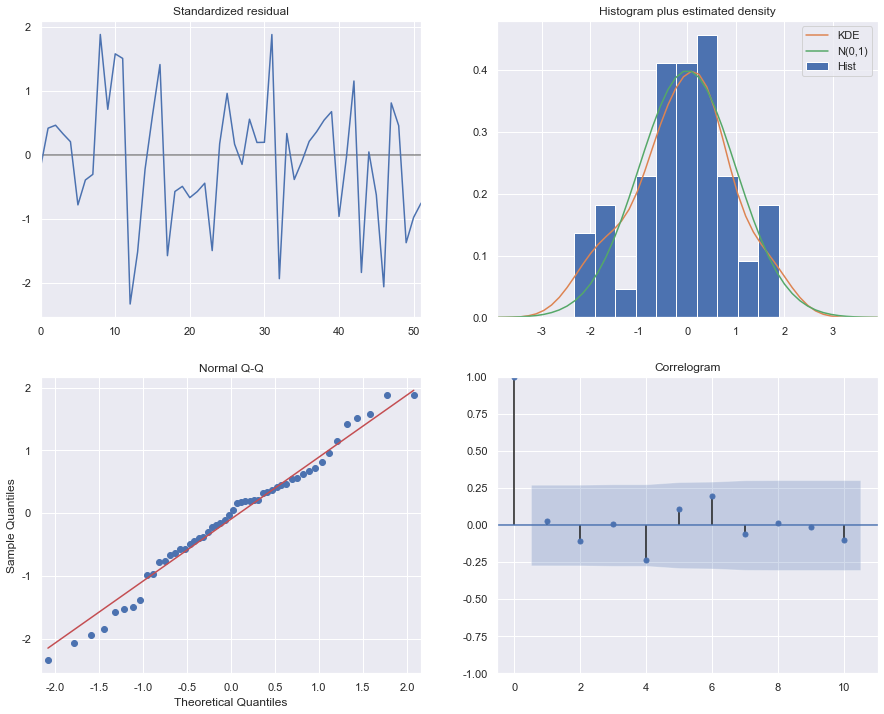

In [38]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [39]:
# ads_diff[0:10]

In [50]:
# #进行验证预测
pred=results.get_prediction(start=np.array(50),dynamic=False)
pred_ci=pred.conf_int()
# print("pred ci:\n",pred_ci)#获得的是一个预测范围，置信区间
# print("pred:\n",pred)#为一个预测对象
# print("pred mean:\n",pred.predicted_mean)#为预测的平均值

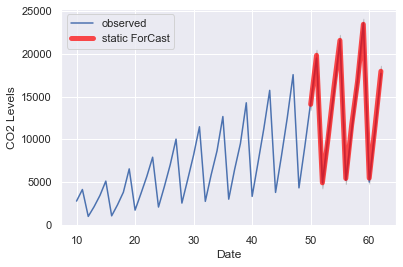

In [43]:
#进行绘制预测图像
ax=df2.value[10:].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="static ForCast",alpha=.7,color='red',linewidth=5)
#在某个范围内进行填充
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

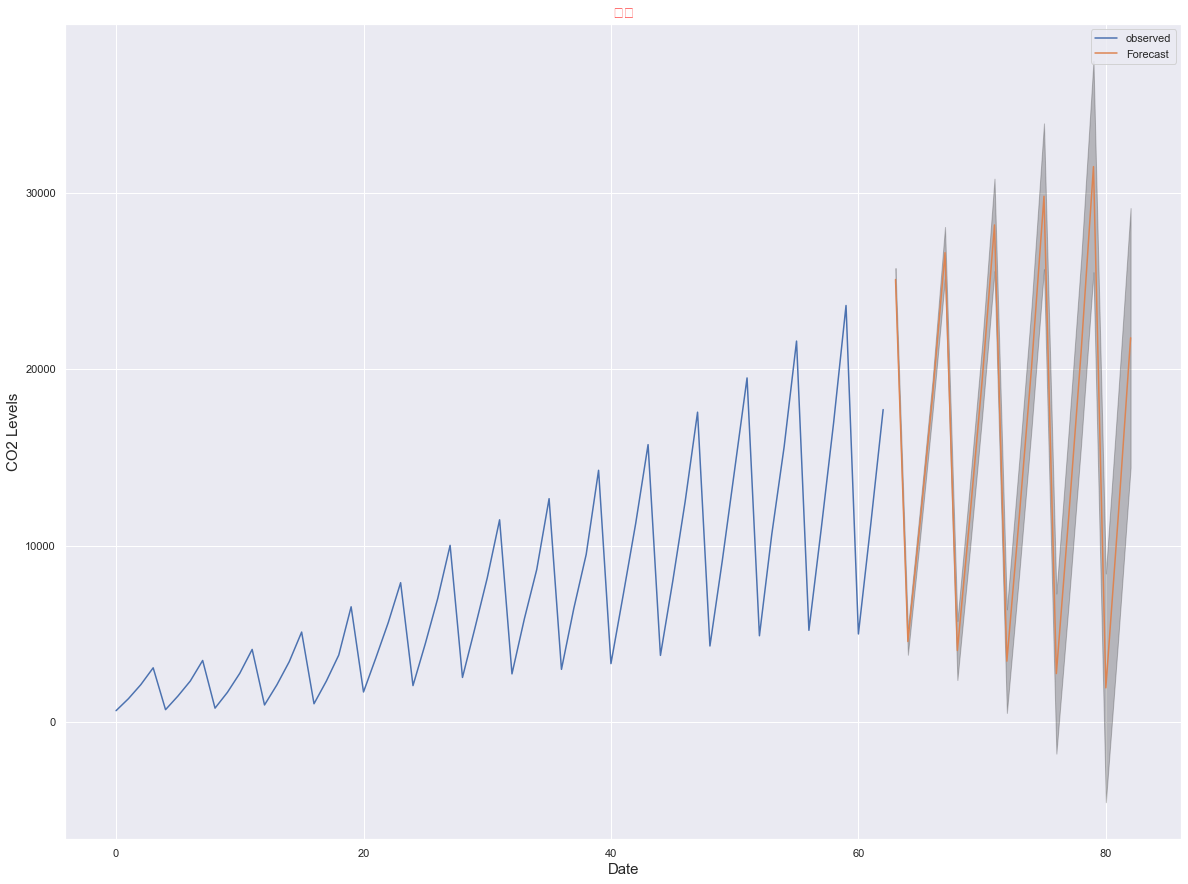

In [49]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
plt.title("预测",fontsize=15,color="red")
ax = df2.value.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('CO2 Levels',fontsize=15)

plt.legend()
plt.show()

In [47]:
pred_ci

,lower value,upper value
63,24432.225233,25728.853908
64,3808.264968,5316.771520
65,10542.589410,12235.953120
66,17590.344188,19450.327825
67,25144.575795,28059.024536
68,2376.783242,5724.822399
69,9660.398479,13388.565993
70,17297.285551,21370.176455
71,25549.878984,30795.736803
72,511.060619,6381.840065
